# **exwecise_3**

## I have used copilot to help me finish the exercise

### Libraries

In [3]:
import nltk
nltk.download('punkt')
from nltk.corpus import gutenberg, stopwords
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist, pos_tag
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

In [4]:
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\admib'\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admib'\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admib'\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admib'\AppData\Roaming\nltk_data...


True

### Tokenization

In [12]:
# Step 1: Tokenization
tokenizer = RegexpTokenizer(r'\w+')
moby_dick = gutenberg.raw('melville-moby_dick.txt')
tokens = tokenizer.tokenize(moby_dick)

### Stop word flitering

In [21]:
# Step 2: Stop-word Filtering
stop_words = stopwords.words('english')
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

In [24]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### POS

In [22]:
# Step 3: Parts-of-Speech (POS) Tagging
pos_tags = pos_tag(filtered_tokens)

In [33]:
print(pos_tags[:20])

[('Moby', 'NNP'), ('Dick', 'NNP'), ('Herman', 'NNP'), ('Melville', 'NNP'), ('1851', 'CD'), ('ETYMOLOGY', 'NNP'), ('Supplied', 'NNP'), ('Late', 'NNP'), ('Consumptive', 'NNP'), ('Usher', 'NNP'), ('Grammar', 'NNP'), ('School', 'NNP'), ('pale', 'NN'), ('Usher', 'NNP'), ('threadbare', 'NN'), ('coat', 'NN'), ('heart', 'NN'), ('body', 'NN'), ('brain', 'NN'), ('see', 'VBP')]


### POS frequency

In [23]:
# Step 4: POS Frequency
pos_freq = FreqDist(tag for word, tag in pos_tags)
common_pos = pos_freq.most_common(5)
print("Most common parts of speech:")
for pos, freq in common_pos:
    print(pos, freq)

Most common parts of speech:
NN 28961
JJ 19614
NNP 10838
NNS 10264
RB 8473


### Lemmatization

In [41]:
# Step 5: Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = []
for token, pos in pos_tags[:20]:
    lemma = lemmatizer.lemmatize(token)
    lemmatized_tokens.append(lemma)
print("Lemmatized tokens:", lemmatized_tokens)

Lemmatized tokens: ['Moby', 'Dick', 'Herman', 'Melville', '1851', 'ETYMOLOGY', 'Supplied', 'Late', 'Consumptive', 'Usher', 'Grammar', 'School', 'pale', 'Usher', 'threadbare', 'coat', 'heart', 'body', 'brain', 'see']


### Plotting

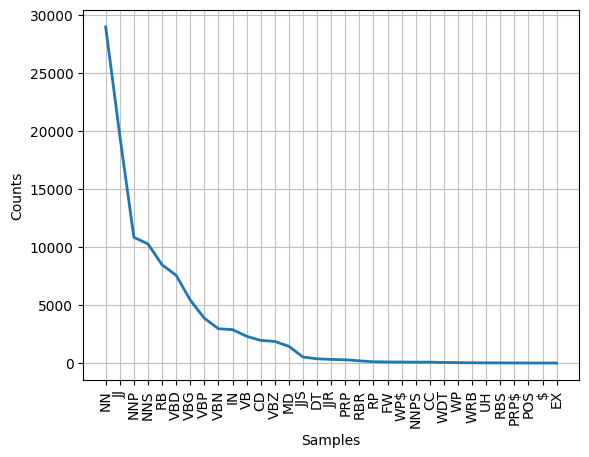

In [19]:
# Step 6: Plotting Frequency Distribution
pos_freq.plot()

plt.show()

# BONUS part

### labraries

In [44]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admib'\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### sentence tokenize

In [45]:
senanl = SentimentIntensityAnalyzer()
tokens_sent = sent_tokenize(moby_dick)


### caculate average sentiment score

In [55]:
sentence_score = []
for i in tokens_sent:
    score = senanl.polarity_scores(i)['compound']
    sentence_score.append(score)

In [57]:
average_score = sum(sentence_score)/len(sentence_score)

### result

In [61]:
if average_score > 0.05:
    print("average sentiment score: ",average_score)
    print("Moby Dick text is positive")
else:
    print("average sentiment score: ",average_score)
    print("Moby Dick text is negative")

average sentiment score:  0.02643698741372306
Moby Dick text is negative
